In [41]:
import pandas as pd
df = pd.read_csv('grow_60.csv')
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1
0,1961Q2,The Marcels,6.0,False,1.0,1,Blue Moon,5.0,3311.181
1,1961Q2,Jorgen Ingmann & His Guitar,4.0,False,2.0,2,Apache,11.0,3311.181
2,1961Q2,Elvis Presley With The Jordanaires,1.0,False,1.0,3,Surrender,7.0,3311.181
3,1961Q2,Chubby Checker,2.0,False,1.0,4,Pony Time,11.0,3311.181
4,1961Q2,The Shirelles,3.0,False,3.0,5,Dedicated To The One I Love,15.0,3311.181
...,...,...,...,...,...,...,...,...,...
26520,1969Q1,Johnny Hallyday,NaN,NaN,NaN,96,Que Je T'aime,NaN,4923.760
26521,1969Q1,Flying Machine,NaN,NaN,NaN,97,Smile A Little Smile For Me,NaN,4923.760
26522,1969Q1,Manfred Mann,NaN,NaN,NaN,98,Fox On the Run,NaN,4923.760
26523,1969Q1,Jackie DeShannon,NaN,NaN,NaN,99,Put a Little Love in Your Heart,NaN,4923.760


In [42]:
df['rank_gain/loss'] = df['track_lp'] - df['track_rank']
df.dropna(inplace=True)
df



,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1,rank_gain/loss
0,1961Q2,The Marcels,6.0,False,1.0,1,Blue Moon,5.0,3311.181,5.0
1,1961Q2,Jorgen Ingmann & His Guitar,4.0,False,2.0,2,Apache,11.0,3311.181,2.0
2,1961Q2,Elvis Presley With The Jordanaires,1.0,False,1.0,3,Surrender,7.0,3311.181,-2.0
3,1961Q2,Chubby Checker,2.0,False,1.0,4,Pony Time,11.0,3311.181,-2.0
4,1961Q2,The Shirelles,3.0,False,3.0,5,Dedicated To The One I Love,15.0,3311.181,-2.0
...,...,...,...,...,...,...,...,...,...,...
25720,1969Q4,Jay & The Americans,54.0,False,45.0,45,Walkin' In The Rain,7.0,4947.104,9.0
25721,1969Q4,Joe Cocker,58.0,False,46.0,46,She Came In Through The Bathroom Window,5.0,4947.104,12.0
25722,1969Q4,Jerry Butler,44.0,False,44.0,47,Don't Let Love Hang You Up,8.0,4947.104,-3.0
25723,1969Q4,Four Tops,45.0,False,45.0,48,Don't Let Him Take Your Love From Me,5.0,4947.104,-3.0


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="rank_gain/loss")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

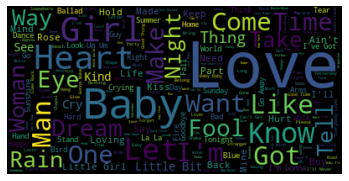

In [44]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.track_title)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [45]:
df = df[df['rank_gain/loss'] != 0]
df['sentiment'] = df['rank_gain/loss'].apply(lambda rating : +1 if rating > 0 else -1)

C:\Users\java\AppData\Local\Temp\ipykernel_12276\701095560.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1,rank_gain/loss,sentiment
0,1961Q2,The Marcels,6.0,False,1.0,1,Blue Moon,5.0,3311.181,5.0,1
1,1961Q2,Jorgen Ingmann & His Guitar,4.0,False,2.0,2,Apache,11.0,3311.181,2.0,1
2,1961Q2,Elvis Presley With The Jordanaires,1.0,False,1.0,3,Surrender,7.0,3311.181,-2.0,-1
3,1961Q2,Chubby Checker,2.0,False,1.0,4,Pony Time,11.0,3311.181,-2.0,-1
4,1961Q2,The Shirelles,3.0,False,3.0,5,Dedicated To The One I Love,15.0,3311.181,-2.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
25720,1969Q4,Jay & The Americans,54.0,False,45.0,45,Walkin' In The Rain,7.0,4947.104,9.0,1
25721,1969Q4,Joe Cocker,58.0,False,46.0,46,She Came In Through The Bathroom Window,5.0,4947.104,12.0,1
25722,1969Q4,Jerry Butler,44.0,False,44.0,47,Don't Let Love Hang You Up,8.0,4947.104,-3.0,-1
25723,1969Q4,Four Tops,45.0,False,45.0,48,Don't Let Him Take Your Love From Me,5.0,4947.104,-3.0,-1


In [47]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

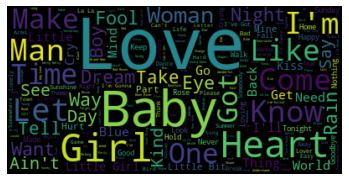

In [48]:
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.track_title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

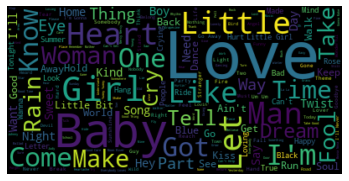

In [49]:
neg = " ".join(review for review in negative.track_title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [50]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

C:\Users\java\AppData\Local\Temp\ipykernel_12276\1108073838.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\java\AppData\Local\Temp\ipykernel_12276\1108073838.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
df['track_title'].value_counts()[:8]

Moon River                          38
Walk On By                          32
Red Roses For A Blue Lady           30
Baby It's You                       27
I Love How You Love Me              26
I Heard It Through The Grapevine    25
Grazing In The Grass                24
Days Of Wine And Roses              24
Name: track_title, dtype: int64

In [52]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['track_title'] = df['track_title'].apply(remove_punctuation)
df = df.dropna(subset=['track_title'])

C:\Users\java\AppData\Local\Temp\ipykernel_12276\3186846728.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
dfNew = df[['track_title','sentiment']]
dfNew.head()

,track_title,sentiment
0,Blue Moon,1
1,Apache,1
2,Surrender,-1
3,Pony Time,-1
4,Dedicated To The One I Love,-1


In [54]:
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['track_title'])
test_matrix = vectorizer.transform(test['track_title'])

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [57]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [58]:
lr.fit(X_train,y_train)

C:\Users\java\Documents\GitHub\economic-impacts-on-music\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [59]:
predictions = lr.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 117,  265],
       [1595, 2906]], dtype=int64)

In [61]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.07      0.31      0.11       382
           1       0.92      0.65      0.76      4501

    accuracy                           0.62      4883
   macro avg       0.49      0.48      0.43      4883
weighted avg       0.85      0.62      0.71      4883

